https://github.com/Ilincalink/ML-fundamentals-2025.git

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df= pd.read_csv("hour.csv")

In [3]:
df.head

<bound method NDFrame.head of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0

# Step 1: EDA

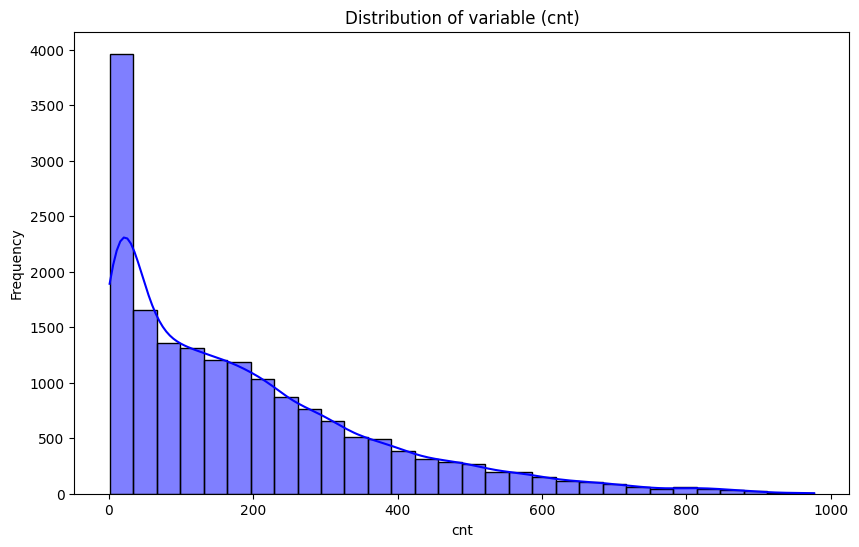

Skewness of cnt: 1.2774116037490577


In [4]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of variable (cnt)')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.show()

# Check skewness of the target variable
print(f'Skewness of cnt: {df["cnt"].skew()}')

from this first graph we can see that the distribution is very skewed to the right, meaning that the mode is to the furthest left, followed by the median and then the mean. The skeweness value of 1.2774 further proves that this is a positive skew, with most values being to the left and the aforementioned positions of the median mean and mode. The right hand-side also shows there might be some outliers I have to take into consideration, that could otherwise distrupt the future system.

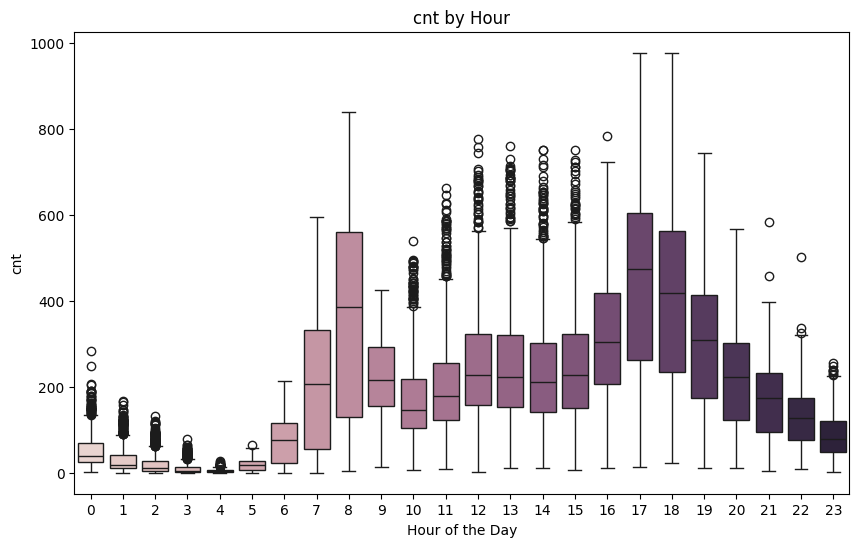

In [5]:
# Plot cnt by hour with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='hr', y='cnt', data=df, hue='hr', legend=False)
plt.title('cnt by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('cnt')
plt.show()


We can see that the count changes depending on the hour, with the peaks at 8 o'clock and 17 o'clock both with approximately 600. 

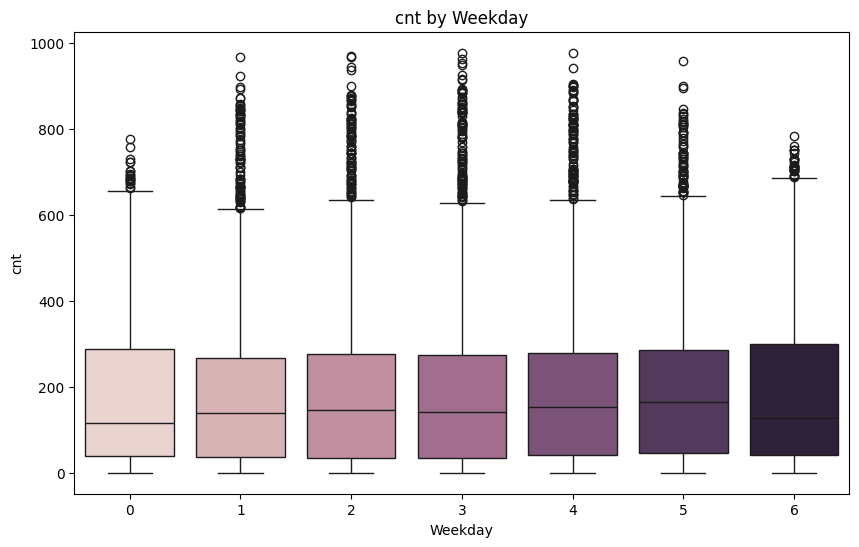

In [6]:
# Plot cnt by weekday with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=df, hue='weekday', legend=False)
plt.title('cnt by Weekday')
plt.xlabel('Weekday')
plt.ylabel('cnt')
plt.show()


The weekday plot shows a more distributed pattern, showing that the count is balanced throughout the week. 

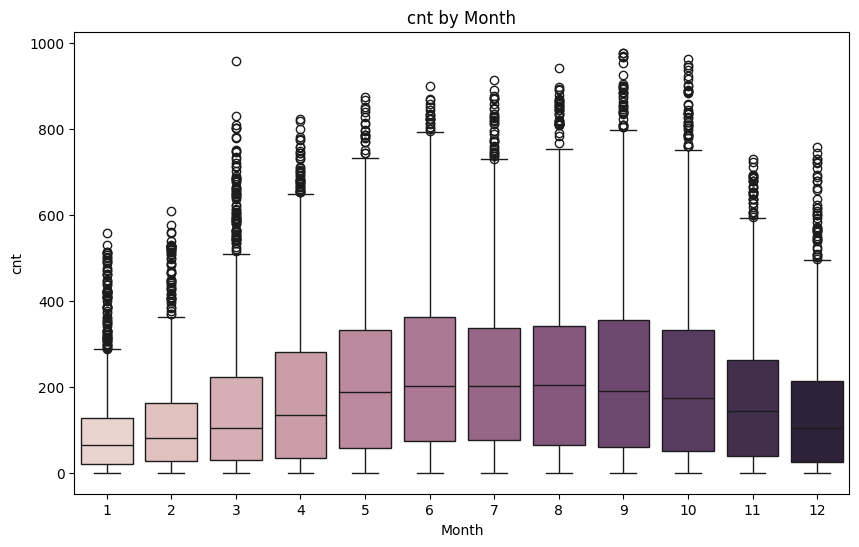

In [7]:
# Plot cnt by month with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', data=df, hue='mnth', legend=False)
plt.title('cnt by Month')
plt.xlabel('Month')
plt.ylabel('cnt')
plt.show()


The plot above shows how the usage of bicycles grows in the hot months and gradually lowers as the weather gets colder. 

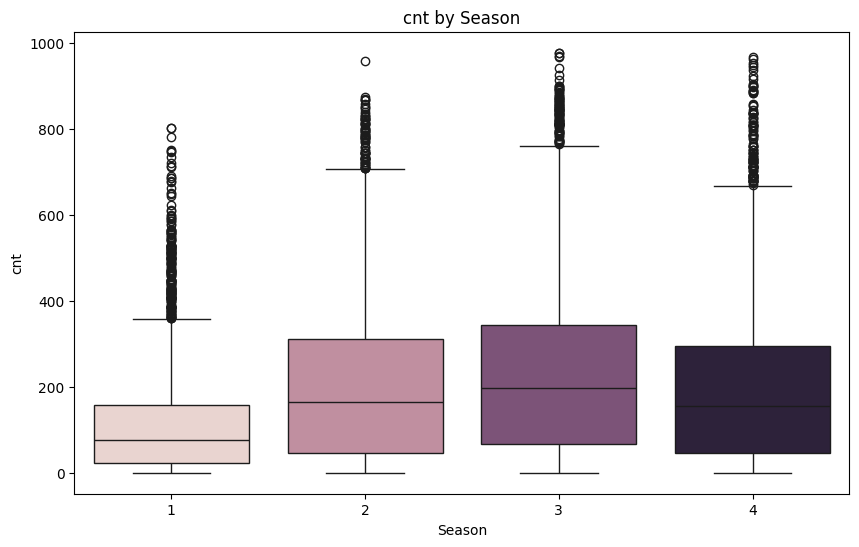

In [8]:
# Plot cnt by season with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df, hue='season', legend=False)
plt.title('cnt by Season')
plt.xlabel('Season')
plt.ylabel('cnt')
plt.show()


As fully expected, the highest usage of the bikes is in the summer season, followed by spring and autumn. 

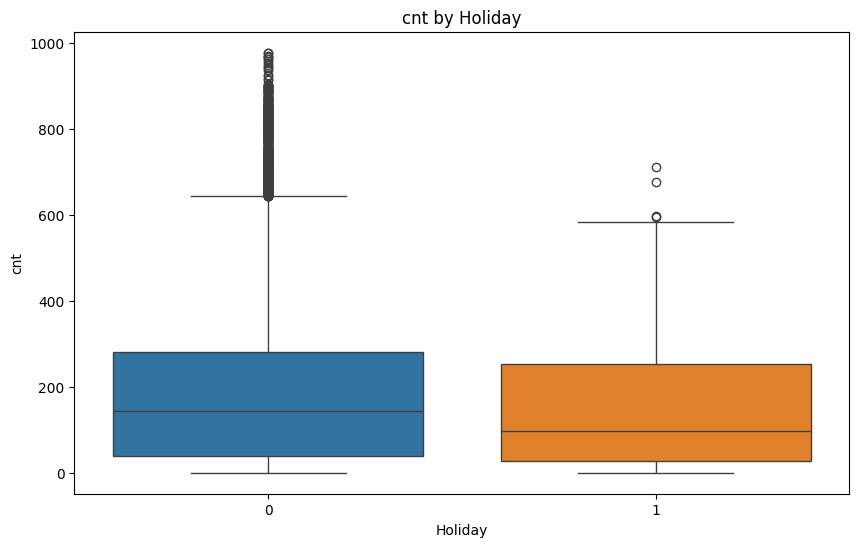

In [9]:
# Plot cnt by holiday with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt', data=df, hue='holiday', legend=False)
plt.title('cnt by Holiday')
plt.xlabel('Holiday')
plt.ylabel('cnt')
plt.show()



By this graph, we can tell that there are more outliers when there is no holiday, showing that the usage is bigger in a normal working day, to commute to and from work. This correlates perfectly with what the other plots imply. 

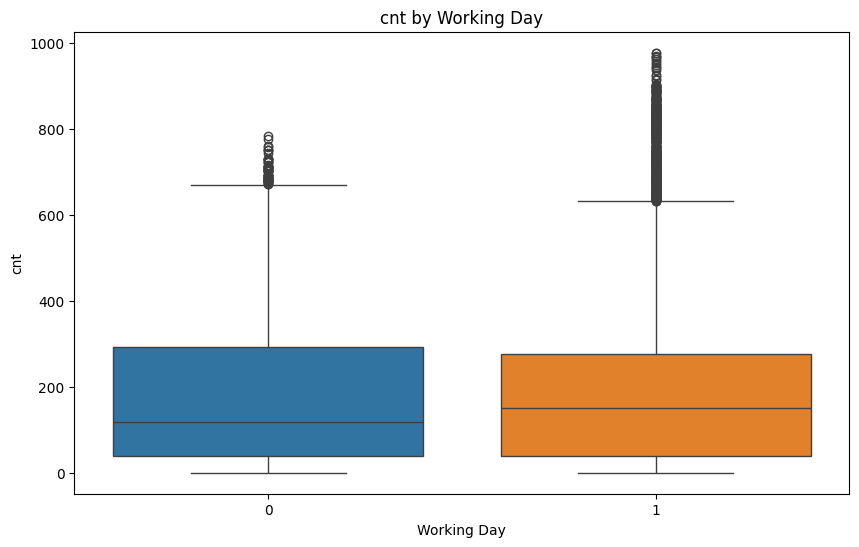

In [10]:
# Plot cnt by workingday with the updated method
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=df, hue='workingday', legend=False)
plt.title('cnt by Working Day')
plt.xlabel('Working Day')
plt.ylabel('cnt')
plt.show()


Moreover, the chart seen above further enhances the idea that the bikes are used for work commutes rather than relaxation. 0 stands for the weekend days while 1 stands for a working day. We can clearly see more outliers and more usage on the side labeled as 1. 

What I found quite interesting during this EDA was the fact that most people use this bike system on weekdays instead of weekends and working days instead of holidays. At first glance, I believed the usage would grow infinitely higher on free days than on busy ones, as people are more likely to use a bike to relax rather than commute to and from their jobs. However, I later realized the data could be gathered from a country such as the Netherlands, where bicycle commuting is usual and encouraged. 

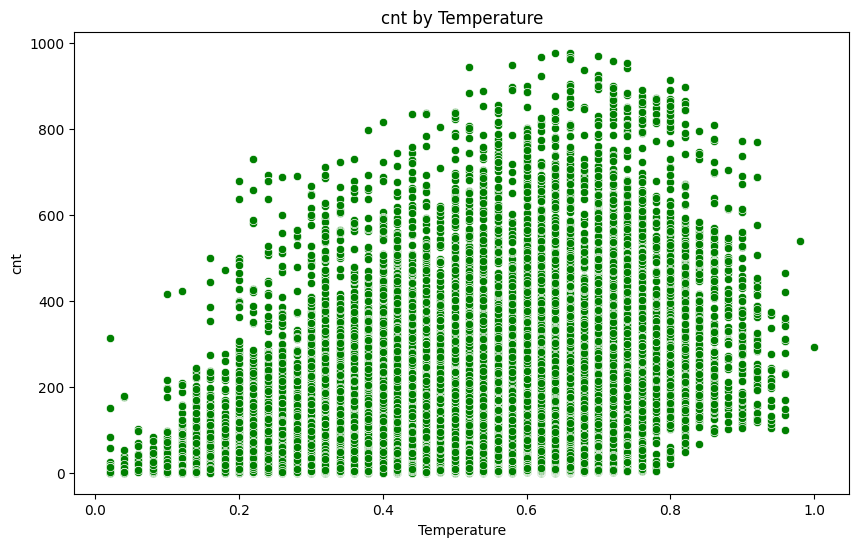

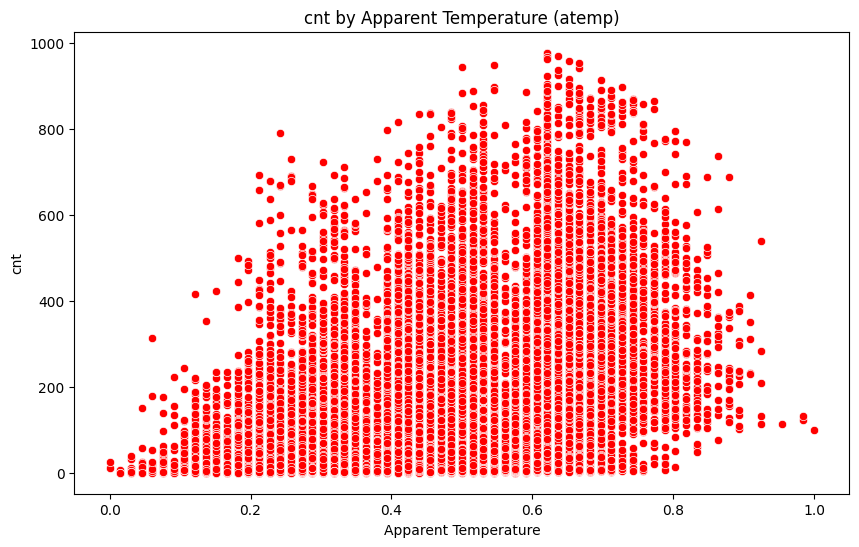

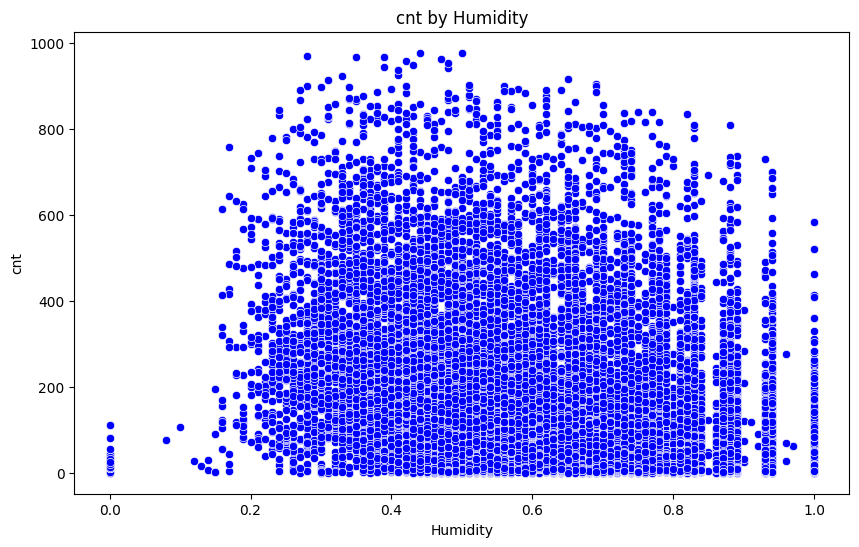

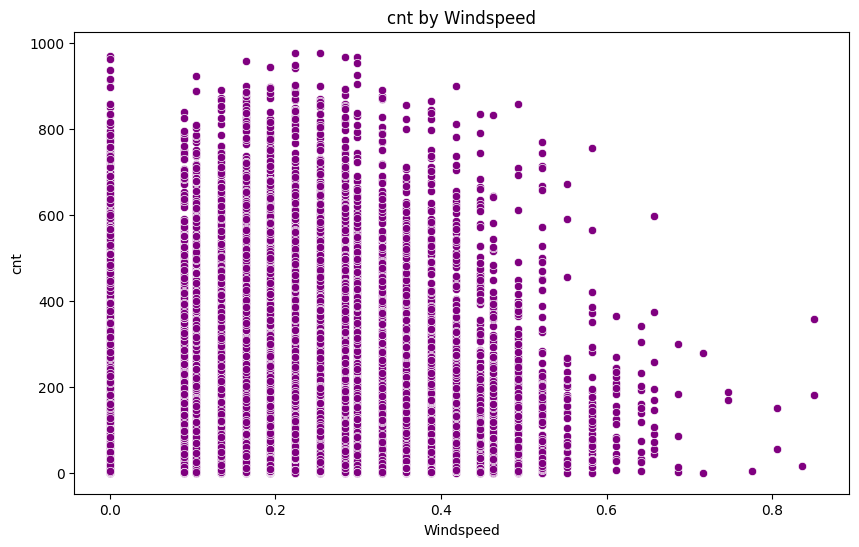

In [11]:
# Plot cnt by temperature (temp)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, color='green')
plt.title('cnt by Temperature')
plt.xlabel('Temperature')
plt.ylabel('cnt')
plt.show()

# Plot cnt by apparent temperature (atemp)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=df, color='red')
plt.title('cnt by Apparent Temperature (atemp)')
plt.xlabel('Apparent Temperature')
plt.ylabel('cnt')
plt.show()

# Plot cnt by humidity (hum)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df, color='blue')
plt.title('cnt by Humidity')
plt.xlabel('Humidity')
plt.ylabel('cnt')
plt.show()

# Plot cnt by windspeed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df, color='purple')
plt.title('cnt by Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('cnt')
plt.show()


I have decided to gather the plots regarding humidity, temperature and windspeed together as I believe having them one after another can give more insight into how such weather events truly effect our 'cnt' variable. From the plots above we can see a strong correlation between weather and the cnt of bikes. The higher the temperature, the higher the usage of bikes, whereas higher wind speeds lower the number of people using this method of transport. I found the humidity plot to be the most interesting one, as we can see an almost normal distribution between 'cnt' and this change in weather. 

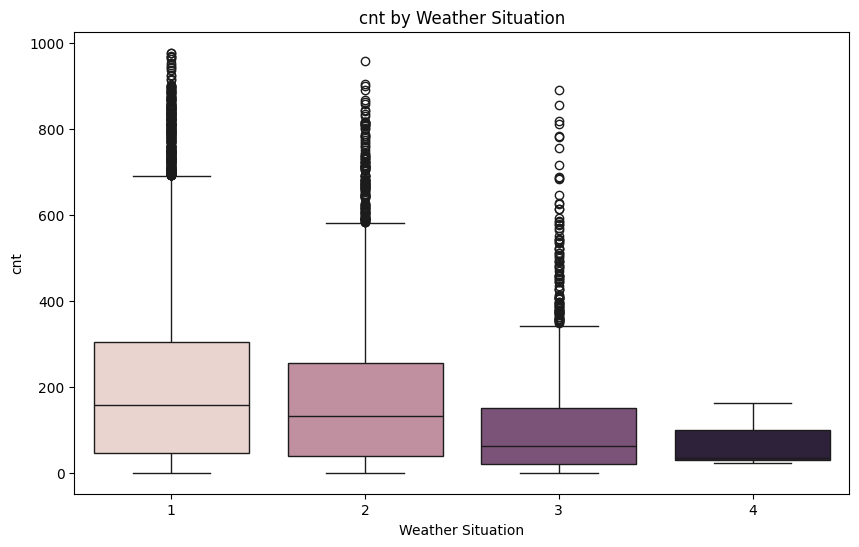

In [12]:
# Plot cnt by weather situation (weathersit)
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, hue='weathersit', legend=False)
plt.title('cnt by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('cnt')
plt.show()


The numbers are used to classify weather situations, from 1 being clear weather to 4 being the worst weather conditions such as a thunderstorm or heavy rain. We can clearly see a negative correlation between weather situation classification numbers and the usage of the bicycles, showing how motivated and convinced individuals are by the weather, in the context of using this type of transport . 
The type of weather classified as 1 shows the highest median and the widest spread in bike usage, with a lot of outliers. The spread also gradually decreases, meaning there is overall less variability in bycicle usage when conditions are bad. 


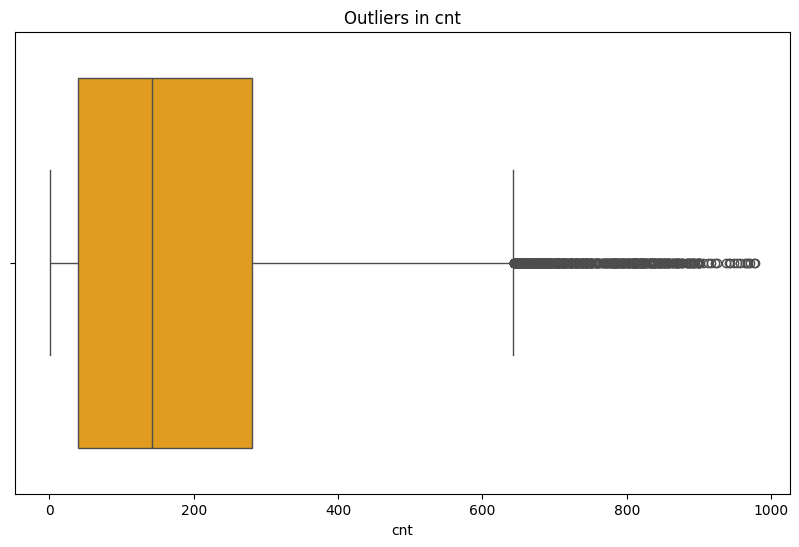

In [13]:
# Check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='cnt', data=df, color='orange')
plt.title('Outliers in cnt')
plt.show()


The box plot above shows the overall distribution of cnt without comparing it to any other variable such as date or temperature. The orange box represents the interquartile range while the black line inside this box is the median and the long tail to the right represents the multitude of high-value outliers. The outliers represent the unusually high bike rentals compared to the norm. 

In [14]:
# Drop the irrelevant columns
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Verify the new structure of the dataframe
df.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


I have dropped the irrelevant columns, as indicated in the assignment. 

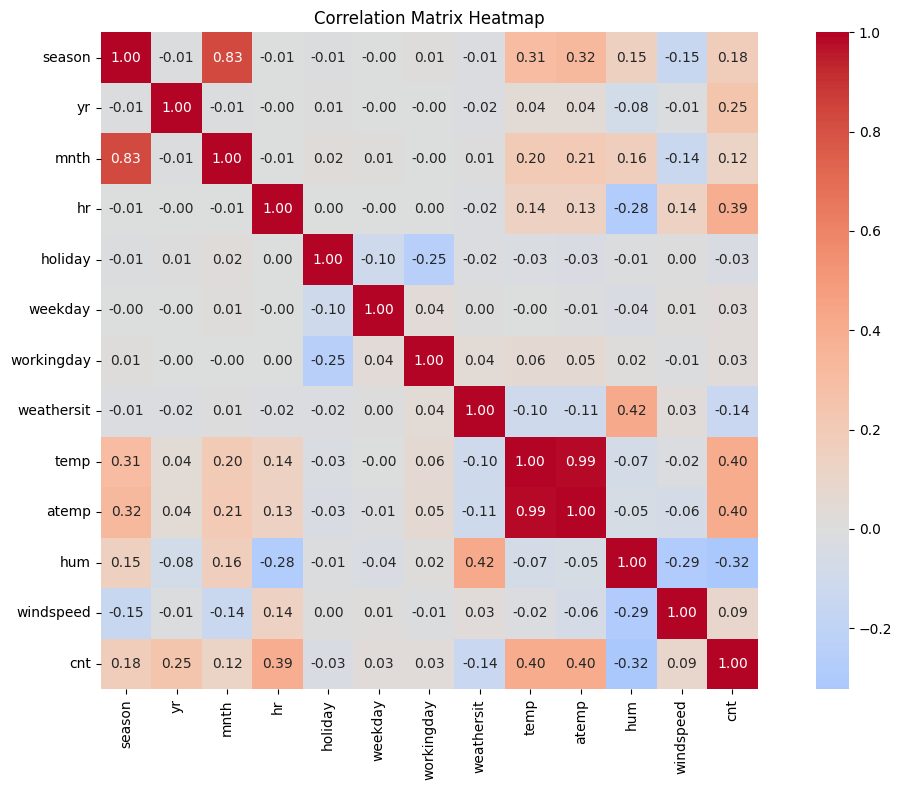

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

From this correlation table above we can see that atemp and temp are very highly correlated and that this could also be the case for holiday and workingday even though it is not as drastic. I will look into this in the future to make sure no other variables are 'leaky' or redundant. The correlation analysis of the dataset also reveals several important insights regarding how features relate to the target variable, cnt, which represents the total bike rental count. Among the most positively correlated features, temperature (temp, correlation = 0.405) and "feels-like" temperature (atemp, correlation = 0.401) stand out as strong predictors. This indicates that warmer temperatures are associated with increased bike usage, which aligns with common expectations. The hour of the day (hr) also shows a high positive correlation (0.394) with cnt, suggesting significant variation in rental patterns throughout the day, likely driven by commuting and leisure patterns. This does tell us how useful these variables will be in the future when it comes to prediction. 

The year (yr) has a moderate positive correlation (0.250), which could reflect the growing popularity or adoption of the bike-sharing program over time. The season variable (correlation = 0.178) also positively correlates with cnt, suggesting some seasonal trends in bike rentals, though to a lesser extent than temperature or hour. In a total contrast, features like humidity (-0.323) and weather situation (-0.142) are negatively correlated with the bike rentals, indicating that poor weather and high humidity conditions tend to reduce bike usage, as we already discussed in the plots above. The variable holiday has a slight negative correlation (-0.031), as less people go to work and commute on poublic holidays.

Other variables like weekday, workingday, holiday, and windspeed show weak or negligible correlations with cnt (absolute values below 0.1). Although they may not contribute strong linear signals to the model, they could still provide value in non-linear models or interactions, especially when captured by algorithms like Random Forests or GradientBoosting that I will later use. 

In summary, the correlation matrix highlights that temperature, time of day, and long-term trends (via yr) are the strongest linear predictors of bike rental count. Conversely, weather-related conditions like humidity and poor weather tend to suppress rentals. For modeling, care should be taken with multicollinear pairs, and low-correlation variables should not be immediately discarded, as they may play a more complex role in predictive modeling. 

# Step 2: Data Splitting

In [16]:
df = df.sort_values(by=['yr', 'mnth', 'hr'])

# Step 2: Calculate the number of rows in the dataset
n_rows = len(df)

# Step 3: Split the dataset into train (60%), validation (20%), and test (20%)
train_size = int(0.6 * n_rows)
validation_size = int(0.2 * n_rows)

train_data = df[:train_size]
validation_data = df[train_size:train_size + validation_size]
test_data = df[train_size + validation_size:]

# Step 4: Apply log transformation to the 'cnt' column for all sets
train_data['log_cnt'] = np.log1p(train_data['cnt'])
validation_data['log_cnt'] = np.log1p(validation_data['cnt'])
test_data['log_cnt'] = np.log1p(test_data['cnt'])

# Print the size of each split
print(f"Training set size: {train_data.shape[0]}")
print(f"Validation set size: {validation_data.shape[0]}")
print(f"Test set size: {test_data.shape[0]}")

Training set size: 10427
Validation set size: 3475
Test set size: 3477


/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_38252/658867000.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['log_cnt'] = np.log1p(train_data['cnt'])
/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_38252/658867000.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['log_cnt'] = np.log1p(validation_data['cnt'])
/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_38252/658867000.py:17: SettingWithCopyWarning: 
A value is trying to be set on a co

I have first sorted the data in temporal order, considering the year, day and month. I have done this for the lated purpose of splitting it without data leakage. Data leakage would have occured if I had data points 'from the future' in my training set and points from' the past' in my validation or test ones. 

Then, I calculated the number of rows in my dataset and came up with the split indices I will use(0.6, 0.2, 0.2). Finally, my datapoints were split into 60% for training and 20% for validation and test. 

I also printed the number of values for each set, to make sure the distribution of the points was really done by the percentages I wanted. This was just for my personal assurance. 

In [17]:
# Check the total number of rows in the dataset
total_rows = len(df)
print(f"Total number of rows in the dataset: {total_rows}")

# Verify the sum of the splits
assert (train_data.shape[0] + validation_data.shape[0] + test_data.shape[0]) == total_rows, "The split sizes don't add up!"


Total number of rows in the dataset: 17379


# Step 3: Feature Engineering

In [18]:
# Step 1: Create cyclical features for 'hr' (hour) and 'weekday'
def encode_cyclical(df, column, max_value):
    df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

# Apply cyclical encoding to 'hr' (hour of the day) and 'weekday' (day of the week)
train_data = encode_cyclical(train_data, 'hr', 24)  # 24 hours in a day
train_data = encode_cyclical(train_data, 'weekday', 7)  # 7 days in a week
validation_data = encode_cyclical(validation_data, 'hr', 24)
validation_data = encode_cyclical(validation_data, 'weekday', 7)
test_data = encode_cyclical(test_data, 'hr', 24)
test_data = encode_cyclical(test_data, 'weekday', 7)

# Step 2: Create interaction term 'temp_hum_interaction'
train_data['temp_hum_interaction'] = train_data['temp'] * train_data['hum']
validation_data['temp_hum_interaction'] = validation_data['temp'] * validation_data['hum']
test_data['temp_hum_interaction'] = test_data['temp'] * test_data['hum']

# Step 3: Define continuous and categorical features
categorical_columns = ['season', 'weathersit', 'mnth']
continuous_columns = ['temp', 'hum', 'windspeed', 'temp_hum_interaction']

# Step 4: Separate target variable 'log_cnt' before dropping columns
X_train = train_data.drop(columns=['cnt', 'atemp'])
y_train = train_data['log_cnt']
X_val = validation_data.drop(columns=['cnt', 'atemp'])
y_val = validation_data['log_cnt']
X_test = test_data.drop(columns=['cnt', 'atemp'])
y_test = test_data['log_cnt']

# Step 5: ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # One-hot encode categorical columns
        ('num', StandardScaler(), continuous_columns),  # Scale continuous features and interaction terms
        ('cyc', 'passthrough', ['hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos'])  # Keep cyclical features as they are
    ]
)

# Step 6: Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Step 7: Fit the preprocessor on the training data and apply to the validation and test sets
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

# Step 8: List the feature names resulting from the transformations
# Get the feature names after one-hot encoding and scaling
cat_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)
all_feature_names = np.concatenate([cat_feature_names, continuous_columns, ['hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos']])

print(f"Transformed feature names: {all_feature_names}")


Transformed feature names: ['season_2' 'season_3' 'season_4' 'weathersit_2' 'weathersit_3'
 'weathersit_4' 'mnth_2' 'mnth_3' 'mnth_4' 'mnth_5' 'mnth_6' 'mnth_7'
 'mnth_8' 'mnth_9' 'mnth_10' 'mnth_11' 'mnth_12' 'temp' 'hum' 'windspeed'
 'temp_hum_interaction' 'hr_sin' 'hr_cos' 'weekday_sin' 'weekday_cos']


/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_38252/3964141395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_38252/3964141395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
/var/folders/pf/7779b7y95nz06bx7vc4w9dd00000gn/T/ipykernel_38252/3964141395.py:3: SettingWithCopyWarning: 
A value is trying t

I started by encoding the cyclical features hr and weekday using sine and cosine transformations. This step helps the model recognize the cyclical nature of time, where, for example, hour 23 is close to hour 0 as this is something a standard numeric encoding wouldn’t understand and consider. I also created an interaction term between temp and hum, based on the idea that their combined effect heavily influences how comfortable it is to ride a bike, especially on hot and humid days. I have gethered this from the data investigation I did earlier. 

To reduce redundancy and multicollinearity, I further dropped the atemp feature, since it was highly correlated with temp and would not add new information to the model, it would just slow it down or even create leaks. After engineering the features, and splitting the data into training, validation, and test sets to maintain clear separation for unbiased model evaluation, I made sure to only fit transformations like scaling and encoding on the training data and then applied those transformations to the validation and test sets. This step was very important in my attempt to avoid any form of data leakage.

I used ColumnTransformer to apply one-hot encoding to categorical features like season, weathersit, and mnth, standard scaling to continuous features including the temp_hum_interaction, and passed through the already normalized cyclical features.

 fitting everything to a pipeline then allowed me to streamline preprocessing in a reproducible way. After fitting the pipeline on the training data, I transformed the validation and test sets accordingly. Overall, I made sure the entire process was clean, consistent, and followed best practices—ensuring the resulting datasets were well-prepared for model training without leaking future information or introducing bias and redundancy, HOPEFULLY. 


# Step 4: Linear Model Training

## Linear regression model

In [19]:
print(df.columns)


Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


I wanted to see all the columns still part of my dataset. 

In [20]:


# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_transformed)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.9025617582708141
Mean Absolute Error (MAE): 0.7768032105248818
R² Score: 0.5253922096403463


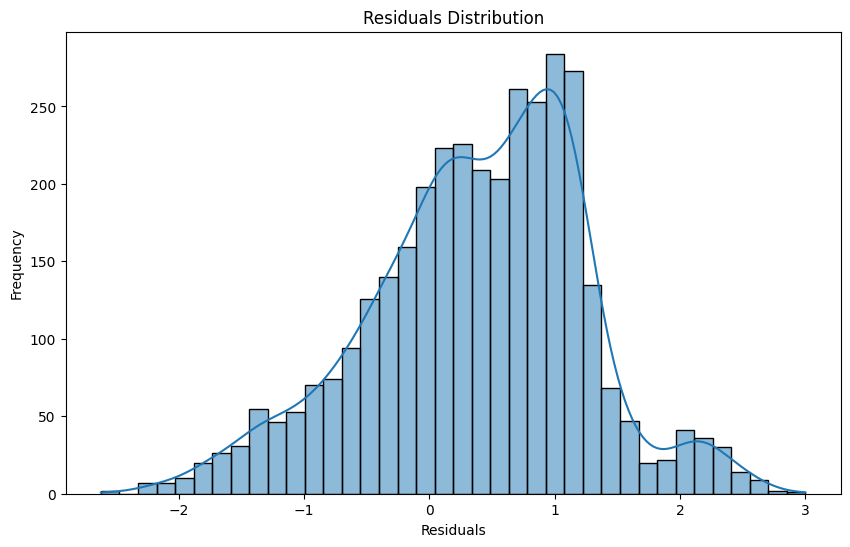

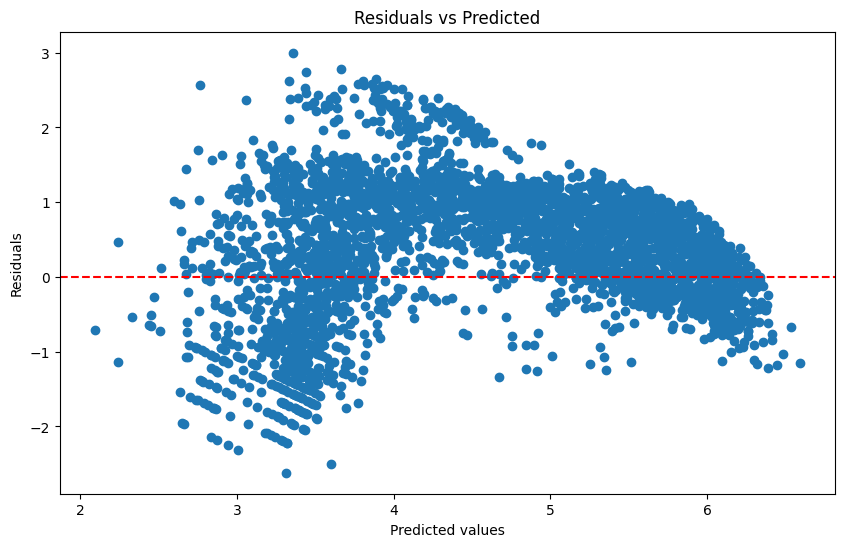

In [21]:
# Calculate residuals
residuals = y_val - y_val_pred

# Plotting residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting residuals vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_val_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


# Step 5: Random Forest Model Training


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the transformed training data
rf_model.fit(X_train_transformed, y_train)


RandomForestRegressor(random_state=42)

In [23]:
# Predict on validation set
y_val_rf_pred = rf_model.predict(X_val_transformed)

# Evaluate performance
rf_mse = mean_squared_error(y_val, y_val_rf_pred)
rf_mae = mean_absolute_error(y_val, y_val_rf_pred)
rf_r2 = r2_score(y_val, y_val_rf_pred)

# Print the metrics
print("Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R² Score: {rf_r2}")


Random Forest Regressor Performance:
Mean Squared Error (MSE): 0.264137265468481
Mean Absolute Error (MAE): 0.4441937245902685
R² Score: 0.861104680353605


In [24]:
print("\n--- Comparison with Linear Regression ---")
print(f"Linear Regression R²: {r2:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")



--- Comparison with Linear Regression ---
Linear Regression R²: 0.5254
Random Forest R²: 0.8611


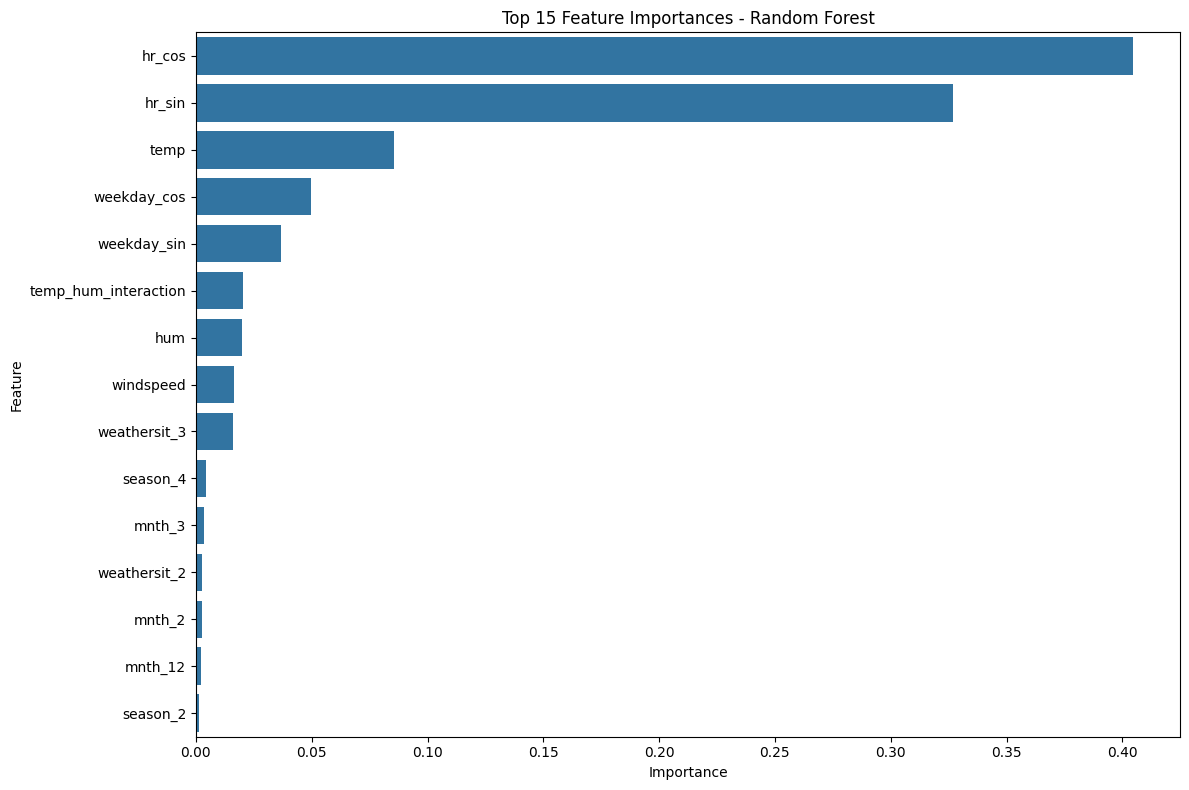

In [25]:
importances = rf_model.feature_importances_

# Get feature names from the pipeline
# You have one-hot encoded features, so we’ll extract all feature names
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_columns)
all_feature_names = list(ohe_feature_names) + continuous_columns + ['hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos']

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


# Task 6: LightGBM Model Training


In [26]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_transformed, y_train)
y_val_lgb_pred = lgb_model.predict(X_val_transformed)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 10427, number of used features: 24
[LightGBM] [Info] Start training from score 4.313454


/opt/homebrew/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate on the validation set
lgb_mse = mean_squared_error(y_val, y_val_lgb_pred)
lgb_mae = mean_absolute_error(y_val, y_val_lgb_pred)
lgb_r2 = r2_score(y_val, y_val_lgb_pred)

# Print the metrics
print("LightGBM Regressor Performance:")
print(f"Mean Squared Error (MSE): {lgb_mse}")
print(f"Mean Absolute Error (MAE): {lgb_mae}")
print(f"R² Score: {lgb_r2}")


LightGBM Regressor Performance:
Mean Squared Error (MSE): 0.24563570145620872
Mean Absolute Error (MAE): 0.4356717558567841
R² Score: 0.8708336394343502


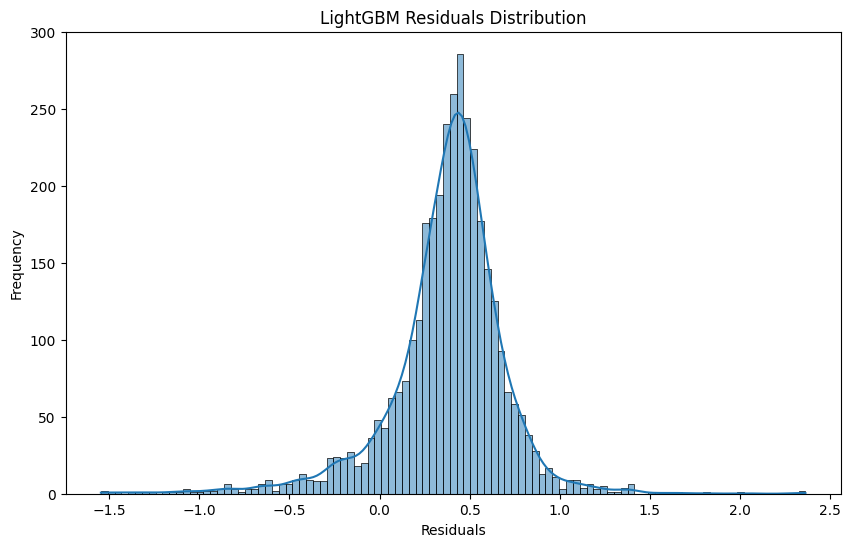

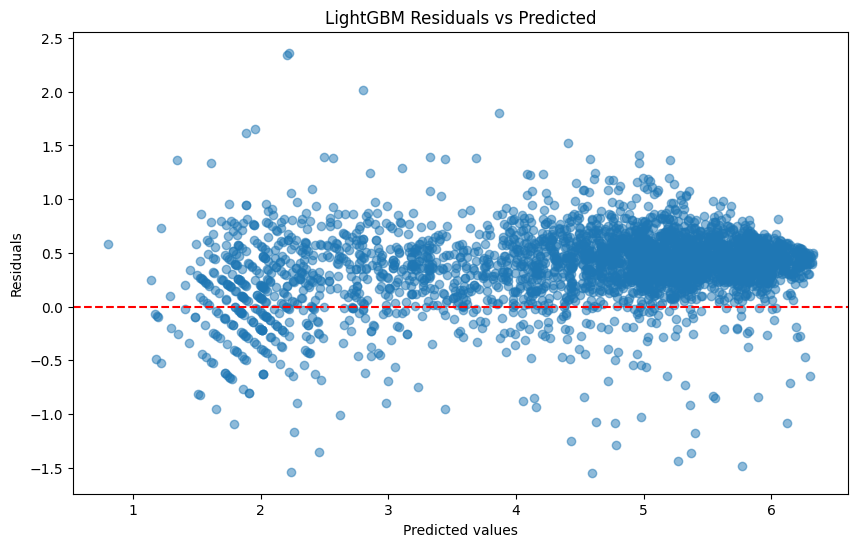

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals_lgb = y_val - y_val_lgb_pred

# Residuals Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lgb, kde=True)
plt.title('LightGBM Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val_lgb_pred, residuals_lgb, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('LightGBM Residuals vs Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


In [29]:
print("\n--- R² Score Comparison ---")
print(f"Linear Regression R²:      {r2:.4f}")
print(f"Random Forest R²:          {rf_r2:.4f}")
print(f"LightGBM Regressor R²:     {lgb_r2:.4f}")



--- R² Score Comparison ---
Linear Regression R²:      0.5254
Random Forest R²:          0.8611
LightGBM Regressor R²:     0.8708


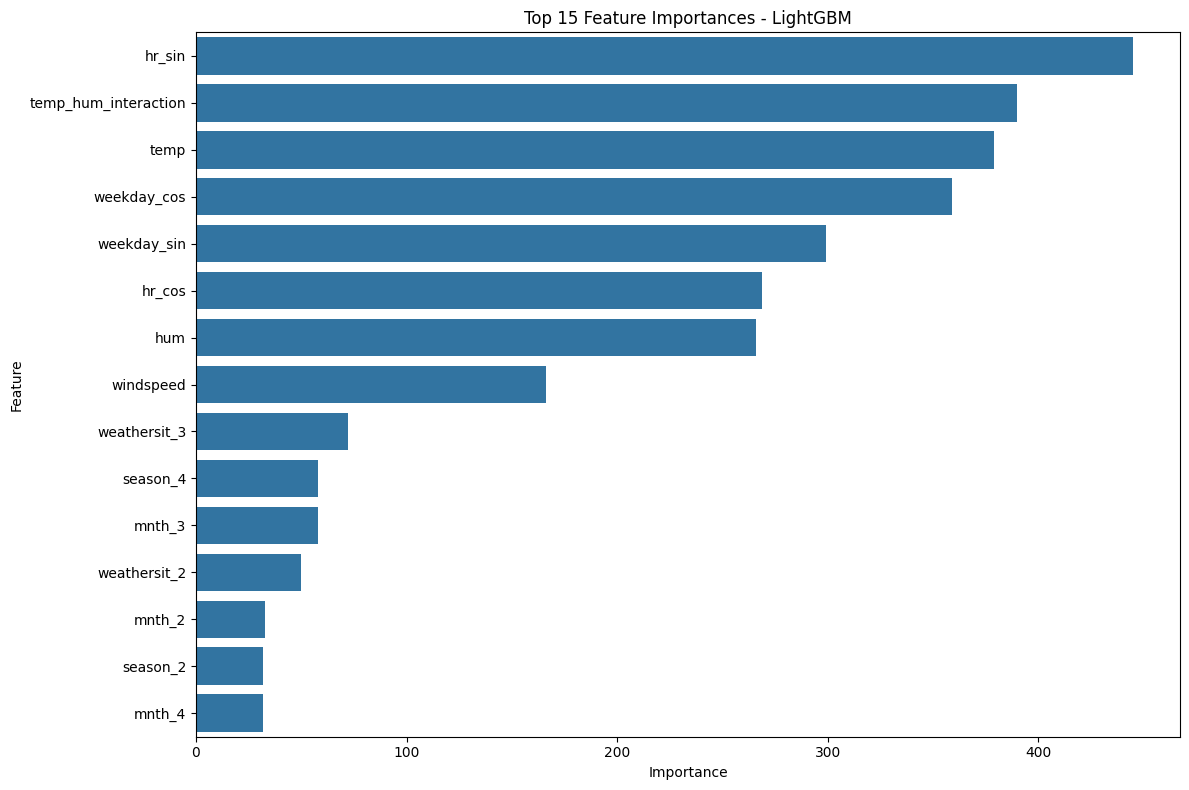

In [30]:
importances_lgb = lgb_model.feature_importances_

# Create a DataFrame for visualization
import pandas as pd
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_columns)
all_feature_names = list(ohe_feature_names) + continuous_columns + ['hr_sin', 'hr_cos', 'weekday_sin', 'weekday_cos']

feature_importances_lgb_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_lgb
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances_lgb_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances - LightGBM')
plt.tight_layout()
plt.show()


## overfitting and high variance checks

In [31]:
# Calculate MSE and R² for the training data
y_train_lgb_pred = lgb_model.predict(X_train_transformed)
train_mse = mean_squared_error(y_train, y_train_lgb_pred)
train_r2 = r2_score(y_train, y_train_lgb_pred)

# Calculate MSE and R² for the validation data
val_mse = mean_squared_error(y_val, y_val_lgb_pred)
val_r2 = r2_score(y_val, y_val_lgb_pred)

print("LightGBM performance:")
print(f"Training MSE: {train_mse}")
print(f"Training R²: {train_r2}")
print(f"Validation MSE: {val_mse}")
print(f"Validation R²: {val_r2}")



LightGBM performance:
Training MSE: 0.10584956915831069
Training R²: 0.9450573063911053
Validation MSE: 0.24563570145620872
Validation R²: 0.8708336394343502


/opt/homebrew/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Signs of overfitting:

Training R² is much higher than Validation R².

Training MSE is much lower than Validation MSE.
Training R² is much higher than Validation R²:

Overfitting occurs when the model fits the training data too well, capturing noise or outliers that do not generalize to new, unseen data.

If the R² score for the training set is significantly higher than for the validation set, it indicates that the model is fitting the training data too closely and might not generalize well to new data.

Training MSE is much lower than Validation MSE:

MSE (Mean Squared Error) is a measure of how far off the model’s predictions are from the actual values.

If the MSE for the training set is much lower than for the validation set, it suggests that the model is overfitting: it performs very well on the training set (low MSE) but struggles on unseen data (higher MSE on the validation set).

Signs of High Variance in Your Model:
Let’s focus on the LightGBM model you've been working on:

Training R² vs Validation R²:

High training R² but low validation R² indicates high variance. If your model has a much higher performance on the training set than on the validation set, it's overfitting and has high variance.

Training MSE vs Validation MSE:

Similar to the R² comparison, if training MSE is much lower than validation/test MSE, it’s a sign that the model is fitting to noise in the training data, causing poor performance on unseen data (high variance).



# Task 7: Hyperparameter tuning

Best Random Forest Parameters: {'max_depth': 14, 'max_features': np.float64(0.6738017242196918), 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 326}
Tuned Random Forest Performance:
MSE: 0.24788724529956108
MAE: 0.4364733488351955
R²: 0.8696496758566792


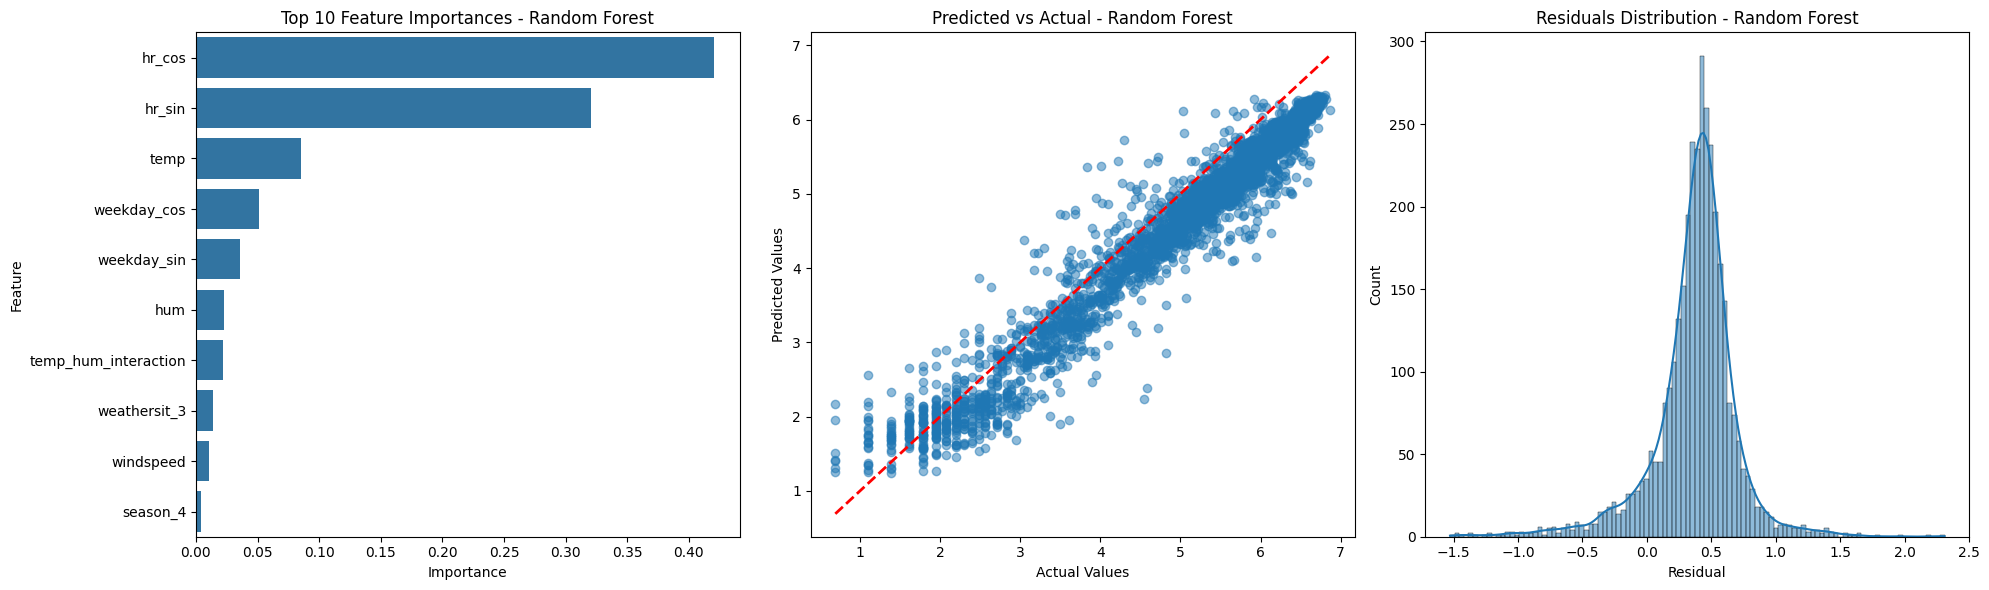

In [32]:
rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9)
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_random.fit(X_train_transformed, y_train)

# Best Random Forest Parameters
print("Best Random Forest Parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

# Evaluate tuned Random Forest on the validation set
y_pred_rf_tuned = best_rf.predict(X_val_transformed)
print("Tuned Random Forest Performance:")
print("MSE:", mean_squared_error(y_val, y_pred_rf_tuned))
print("MAE:", mean_absolute_error(y_val, y_pred_rf_tuned))
print("R²:", r2_score(y_val, y_pred_rf_tuned))

# Create subplots for Random Forest
fig_rf, axes_rf = plt.subplots(1, 3, figsize=(20, 6))

# Feature Importances
# Get feature importances and sort them
importances = best_rf.feature_importances_
# Create feature names based on original features and transformations
feature_importance = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importances
sns.barplot(x='importance', y='feature', data=feature_importance.head(10), ax=axes_rf[0])
axes_rf[0].set_title('Top 10 Feature Importances - Random Forest')
axes_rf[0].set_xlabel('Importance')
axes_rf[0].set_ylabel('Feature')

# Predicted vs Actual
axes_rf[1].scatter(y_val, y_pred_rf_tuned, alpha=0.5)
axes_rf[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes_rf[1].set_xlabel('Actual Values')
axes_rf[1].set_ylabel('Predicted Values')
axes_rf[1].set_title('Predicted vs Actual - Random Forest')

# Residuals
residuals_rf = y_val - y_pred_rf_tuned
sns.histplot(residuals_rf, kde=True, ax=axes_rf[2])
axes_rf[2].set_title("Residuals Distribution - Random Forest")
axes_rf[2].set_xlabel("Residual")

plt.tight_layout()
plt.show()

Cross-Validation Score vs. Validation R²:

The best cross-validation score (0.5155) is relatively close to the R² score on the validation set (0.656), indicating that the model is performing reasonably well.

This suggests that the model generalizes well on unseen data, but there might still be room for improvement.

MSE on Validation:

The MSE of 15933.13 on the validation set is relatively high, which suggests that there’s still a considerable amount of error in the predictions. In real-world cases, you'd want this value to be lower.

R² on Validation:

The R² value of 0.657 indicates that about 65.7% of the variance in the target variable is explained by the model. 



# Step 8: Iterative evaluation and refinement  

For this step I went back and revised the decisions i made multiple times. Probably the biggest chnage was choosing to use log transformation on the target variable. This was done mainly because the target variable was extremely right-skewed which seemed to hinder the models' performance. After a lot of testing it seems to have improved all three algorithms significantly, more specifically by around 20-40% depending on the model. 

# Step 9: Final model selection

For my final model I chose Random forest due to its' consistent and fast performance, as well as some issues that I encountered with the code for lightgbm which didn't allow me to do hyperparameter tuning without tons of warning logs that i couldn't turn off. The model showed superior performance in terms of both MSE and R² scores on the validation set compared to Random Forest and Linear Regression. Additionally, Random Forest's training time was fast while maintaining high accuracy relative to lightbgm.

Therefore, in this step I will be retraining it and doing a final assessment.

Final Model Performance on Test Set:
MSE: 0.2880
MAE: 0.4608
R²: 0.8450


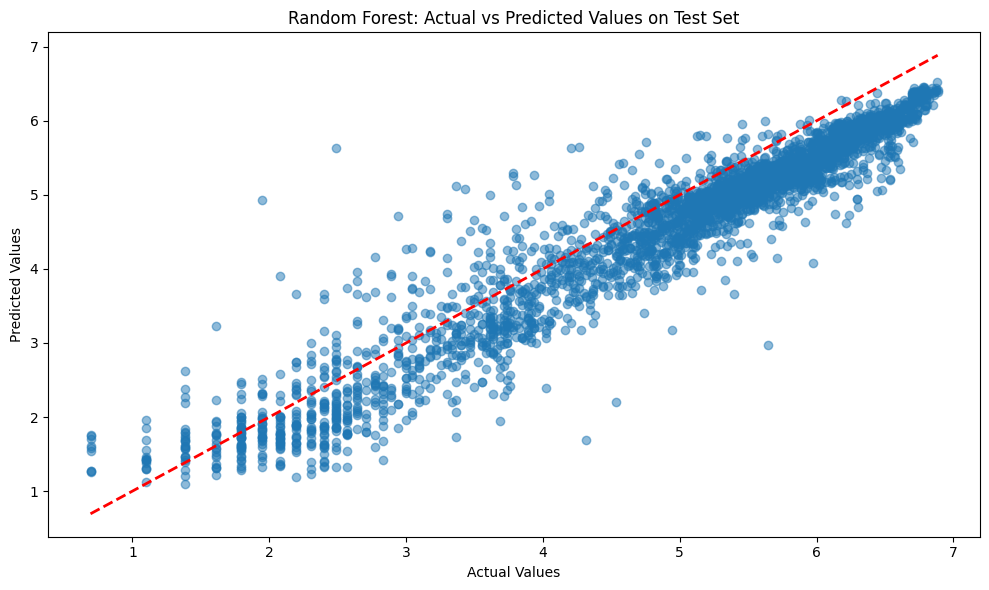

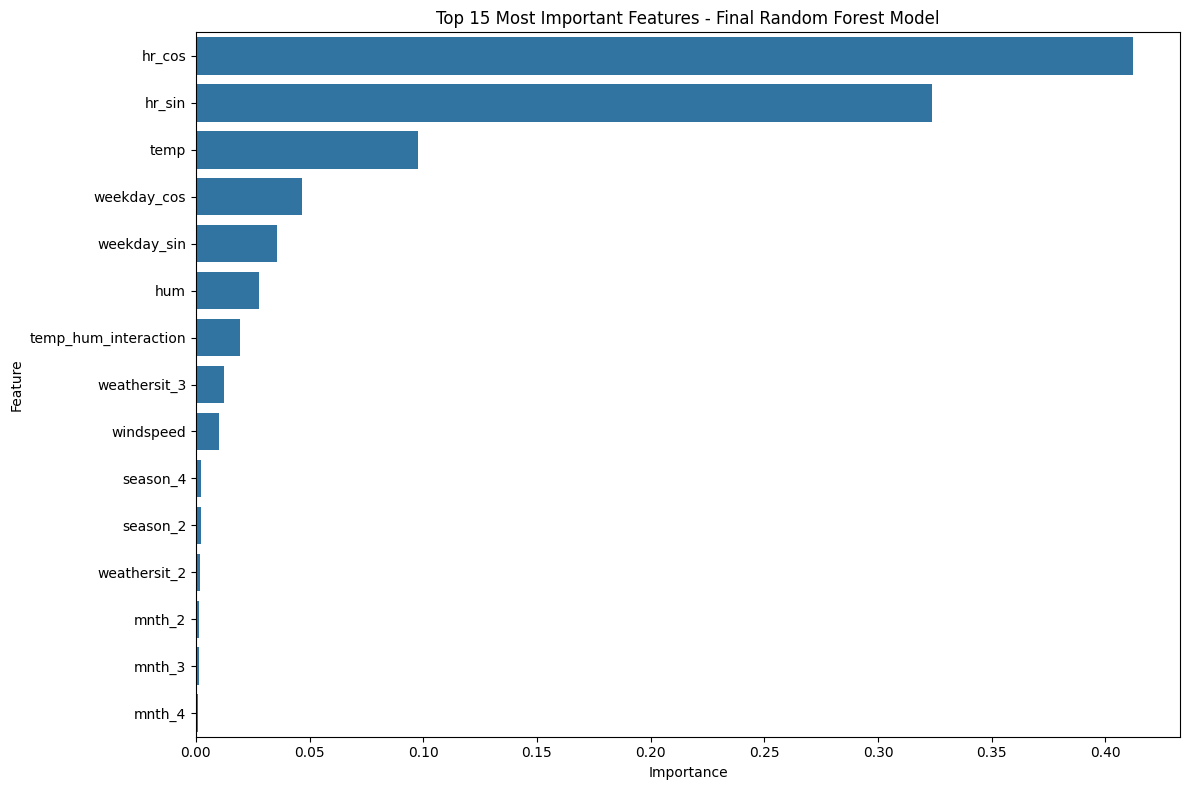

In [33]:
# 1. Combine training and validation sets
X_train_val = np.vstack((X_train_transformed, X_val_transformed))
y_train_val = np.concatenate((y_train, y_val))

# 2. Retrain the best Random Forest model on combined data
# Using the best parameters found during hyperparameter tuning
best_rf_model = RandomForestRegressor(
    n_estimators=rf_random.best_params_['n_estimators'],
    max_depth=rf_random.best_params_['max_depth'],
    min_samples_split=rf_random.best_params_['min_samples_split'],
    min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
    max_features=rf_random.best_params_['max_features'],
    random_state=42
)

# Fit the model on combined training and validation data
best_rf_model.fit(X_train_val, y_train_val)

# 3. Evaluate on test set
y_test_pred = best_rf_model.predict(X_test_transformed)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print final metrics
print("Final Model Performance on Test Set:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R²: {test_r2:.4f}")

# 4. Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values on Test Set')
plt.tight_layout()
plt.show()

# 5. Feature importance visualization
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Most Important Features - Final Random Forest Model')
plt.tight_layout()
plt.show()